In [1]:
from plotdelice.graphs import violinplot_delice, barplot_delice
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imaris_ims_file_reader.ims import ims
import os
import seaborn as sns
import random
from tabulate import tabulate
from scipy import stats
import math

In [2]:

def calculate_angle(x1, y1, x2, y2):
    # calculate between x-axis and segment
    x1 = np.abs(x1)
    x2 = np.abs(x2)
    y1 = np.abs(y1)
    y2 = np.abs(y2)
    delta_x = x2 - x1
    delta_y = y2 - y1
    angle_rad = math.atan2(delta_y, delta_x)
    angle_deg = math.degrees(angle_rad)
    return np.abs(angle_deg)



# Somite angle quantification


In [3]:
import os
import pandas as pd

# Load data
path = '/Users/quillan/Documents/Lab/Thesis/Chevron Analysis/Somites_angles/'
somites = pd.DataFrame()  # Initialize an empty DataFrame
for file in os.listdir(path):
    if file.endswith('csv'):
        df = pd.read_csv(os.path.join(path, file))
        df['genotype'] = file.split('_')[0]
        df['name'] = file
        # Append the current DataFrame (df) to the list of DataFrames
        somites = pd.concat([somites, df], ignore_index=True)

In [4]:
angles = pd.DataFrame({"name": somites["name"], "genotype": somites["genotype"], "angle": np.nan,"somite": somites["index"]})

# Iterate through unique fish indices
for fish in np.unique(somites['name']):
    #print(fish)
    for somite in np.unique(somites["index"][somites['name']==fish]):   # iterate of every somite in the fish
        #print(fish, df["treat"][df["index"] == fish].iloc[0])
        #print("somite: ",somite)
        y0 = 0
        x0 = 0
        x = (somites["axis-1"][(somites["index"] == somite) & (somites["name"] == fish)] - x0)# *pixel_size
        y = (somites["axis-0"][(somites["index"] == somite) & (somites["name"] == fish)] - y0)# *pixel_size
        #print(x)
        angle = calculate_angle(x.iloc[1], y.iloc[1], x.iloc[0], y.iloc[0])-calculate_angle(x.iloc[-1], y.iloc[-1], x.iloc[1], y.iloc[1])
        #angles["angle"][(angles["name"] == fish)] = angle
        
        angles.loc[((angles["name"] == fish)&(angles["somite"] == somite)),"angle"] = np.abs(angle)

In [11]:
angles = angles.drop_duplicates()
print(np.unique(angles['name']))

['Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F0.csv'
 'Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F1.ims.csv'
 'Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F2.ims.csv'
 'Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F3.ims.csv'
 'Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F4.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F00.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F01.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F02.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F03.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F04.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F05.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F06.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F07.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F08.ims.csv'
 'Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F09.ims.csv'
 'WT_2dpf_4D9-488_DAPI_2024-04-19_F0.ims.csv'
 'WT_2dpf_4D9-488_DAPI_2024-04-19_F1.ims.csv'
 'WT_2dpf_4D9-488_DAPI_2024-04-19_F2.ims.csv'
 'WT_2dpf_4D9-488_DAPI_2024-04-19_F3.ims.csv'
 'WT_2dpf_4D9-488_DAPI_2024-04-19_F4.ims.csv'
 'WT_2dpf_4D9-

    Cc2d2a mean:                             83.45712018628144
    Inpp5e mean:                              78.4895605350691
        WT mean:                             82.30159211405048
Normality test p-value for the entire dataset (Shapiro): 0.15729480981826782
Data follows normal distribution: Yes
ANOVA: p-val: 0.0004739903249885617


/Users/quillan/Documents/Gadgets/plotdelice/plotdelice/stats.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = anova_table["PR(>F)"][0]


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Cc2d2a Inpp5e  -4.9676 0.0013 -8.2495 -1.6856   True
Cc2d2a     WT  -1.1555 0.7398 -4.8441   2.533  False
Inpp5e     WT    3.812 0.0121    0.69   6.934   True
----------------------------------------------------


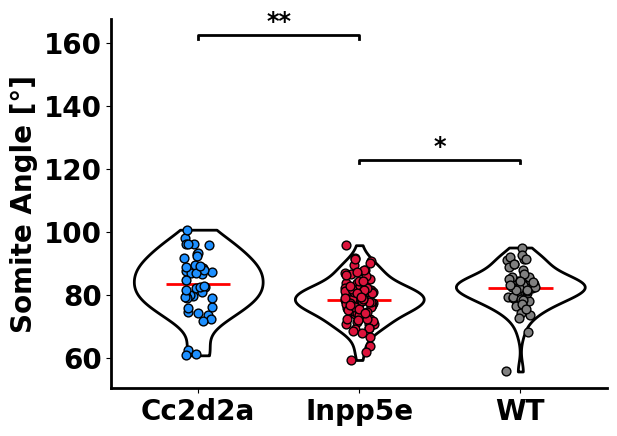

(<Figure size 640x480 with 1 Axes>, <Axes: ylabel='Somite Angle [°]'>)

In [7]:
df = angles
x_group = "genotype"
y_variable = "angle"
violin_width = 0.8
y_label = r'Somite Angle [°]'
colors=['dodgerblue','crimson','grey']
violinplot_delice(df,x_group,y_variable,violin_width=violin_width,y_label=y_label,palette="Greens_d",colors=colors,point_size=40,jitter=0.09,title="",title_size = 50)

#violin.savefig("/Users/quillan/Documents/Lab/Thesis/Thesis_2024/Spinal muscle stainings/Figures/F01-004-Somites-Angles.pdf", bbox_inches='tight')